In [1]:
import sys
sys.path.append("../")

In [2]:
from itertools import cycle, islice

In [3]:
from sklearn import mixture
from sklearn import metrics
from sklearn.cluster import KMeans

In [4]:
import numpy as np
from scipy.stats import kde
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [5]:
sns.set(color_codes=True)

In [6]:
def load_data_file(filename):

    with open(filename) as file:
        context = file.read()
        size = len(context)
        arraystr= context[1:size-1]
        arraystr = arraystr.split(',')
        region_means = [float(item) for item in arraystr]
        return region_means

In [7]:
wga_mean_file = "/home/david/Desktop/wga_windows_mean_0_GMM.txt"
no_wga_mean_file = "/home/david/Desktop/no_wga_windows_mean_0_GMM.txt"
gc_file = "/home/david/Desktop/windows_gc_0_GMM.txt"

In [8]:
wga_mu = load_data_file(filename=wga_mean_file)
no_wga_mu = load_data_file(filename=no_wga_mean_file)
gc = load_data_file(filename=gc_file)

In [9]:
assert len(wga_mu) == len(no_wga_mu)
assert len(gc) == len(wga_mu)

In [10]:
print("Size of WGA sample {0}".format(len(wga_mu)))
print("WGA max: {0}".format(max(wga_mu)))
print("WGA min: {0}".format(min(wga_mu)))
print("WGA mean: {0}".format(np.mean(wga_mu)))
print("WGA var: {0}".format(np.var(wga_mu)))

Size of WGA sample 185329
WGA max: 52.13
WGA min: 0.0
WGA mean: 18.00699696215919
WGA var: 100.56252905243802


In [11]:
#sns.distplot(wga_mu, bins=35, kde=False, rug=True)
#plt.xlabel("WGA means")
#plt.show()

In [12]:
print("NO-WGA size {0}".format(len(no_wga_mu)))
print("NO-WGA max: {0}".format(max(no_wga_mu)))
print("NO-WGA min: {0}".format(min(no_wga_mu)))
print("NO-WGA mean: {0}".format(np.mean(no_wga_mu)))
print("NO-WGA var: {0}".format(np.var(no_wga_mu)))

NO-WGA size 185329
NO-WGA max: 35.17
NO-WGA min: 0.0
NO-WGA mean: 16.24269504502803
NO-WGA var: 21.10931204078077


In [13]:
#sns.distplot(no_wga_mu, bins=35, kde=False, rug=True)
#plt.xlabel("NO-WGA means")
#plt.show()

In [14]:
#nbins = 100
#min_ = 0.0
#max_ = 50.0
#density=False
#plt.hist2d(no_wga_mu, wga_mu,
#             bins=[nbins, nbins], cmap='Blues', density=density,
#             cmax=1000, cmin=0, alpha=0.99,
#             range=((min_, max_), (min_, max_)))

#kernel= kde.gaussian_kde(np.vstack([no_wga_mu, wga_mu]))
#xi, yi = np.mgrid[min_:max_:nbins*1j,
#                    min_:max_:nbins*1j]
#zi = kernel(np.vstack([xi.flatten(), yi.flatten()]))
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap='Blues') 
#plt.contour(xi, yi, zi.reshape(xi.shape) )

#plt.show()

In [68]:
X = np.stack((no_wga_mu, wga_mu), axis=0)
cov = np.cov(X)
print("Covariance matrix: \n", cov)

v, w = linalg.eigh(cov)
print(" Eigenvalues: \n", v)
print(" Eigenvectors: \n", w)

Covariance matrix: 
 [[ 21.10942594  11.99723456]
 [ 11.99723456 100.56307167]]
 Eigenvalues: 
 [ 19.33740434 102.33509327]
 Eigenvectors: 
 [[-0.98926728  0.14611726]
 [ 0.14611726  0.98926728]]


In [69]:
ratio = []
for no_wga, wga  in zip(no_wga_mu, wga_mu):
    ratio.append((wga + 1)/(no_wga + 1))
    
ratio = np.array(ratio)
print("NaN in ratio: ", np.any(np.isnan(ratio)))
print("Max ratio: ", max(ratio))
print("Min ratio: ", min(ratio))
X = np.stack((no_wga_mu, wga_mu, ratio), axis=0)
cov = np.cov(X)
print("Covariance matrix: \n", cov)

v, w = linalg.eigh(cov)
print(" Eigenvalues: \n", v)
print(" Eigenvectors: \n", w)

NaN in ratio:  False
Max ratio:  10.748587570621469
Min ratio:  0.027878449958182328
Covariance matrix: 
 [[ 21.10942594  11.99723456  -0.66658645]
 [ 11.99723456 100.56307167   5.32225399]
 [ -0.66658645   5.32225399   0.39999826]]
 Eigenvalues: 
 [3.19770266e-02 1.94440473e+01 1.02596472e+02]
 Eigenvectors: 
 [[ 0.06599407  0.98721833 -0.14506811]
 [-0.06060407 -0.14115098 -0.98813134]
 [ 0.99597788 -0.07400252 -0.05051432]]


Text(0.5, 0, 'Ratio')

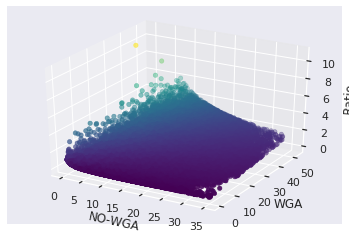

In [81]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(no_wga_mu, wga_mu, ratio, c=ratio, cmap='viridis', linewidth=0.5);
ax.set_xlabel('NO-WGA')
ax.set_ylabel('WGA')
ax.set_zlabel('Ratio')

In [ ]:
pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
print("Pearson correlation: ", pearson)

In [16]:
#fig, axs = plt.subplots(1, 1)#, figsize=(9, 3))
#nbins = 100
#min_ = 0.0
#max_ = 50.0
#density=False
#plt.hist2d(no_wga_mu, wga_mu,
#             bins=[nbins, nbins], cmap='Blues', density=density,
#             cmax=1000, cmin=0, alpha=0.99,
#             range=((min_, max_), (min_, max_)))

#v, w = linalg.eigh(cov)
    
#angle = np.arctan2(w[0][1], w[0][0])
#angle = 180. * angle / np.pi  # convert to degrees
#v = 2. * np.sqrt(2.) * np.sqrt(v)
#ell = mpl.patches.Ellipse(means, v[0], v[1], 180. + angle, color='darkorange')
#ell.set_alpha(.6)
#axs.add_patch(ell)
#plt.show()

In [17]:
print("GC size {0}".format(len(gc)))
print("GC max: {0}".format(max(gc)))
print("GC min: {0}".format(min(gc)))
print("GC mean: {0}".format(np.mean(gc)))
print("GC var: {0}".format(np.var(gc)))

GC size 185329
GC max: 0.93
GC min: 0.0
GC mean: 0.49600305402824174
GC var: 0.01198275802638238


In [18]:
#sns.distplot(gc, bins=35, kde=False, rug=True)
#plt.xlabel("Ref GC content")
#plt.show()

In [20]:
#sns.distplot(ratio, bins=35, kde=False, rug=True)
#plt.xlabel("NO-WGA means")
#plt.show()

In [21]:
#plt.scatter(wga_mu, ratio)
#plt.show()

In [22]:
#plt.scatter(no_wga_mu, ratio)
#plt.show()

In [23]:
def make_data_array(wga_mu, no_wga_mu, gc, use_ratio, use_gc):
    data = []
    
    if use_ratio and use_gc:
        for no_wga_val, wga_val,gc_val in zip(no_wga_mu, wga_mu, gc):
            data.append([no_wga_val, wga_val, (wga_val + 1)/(no_wga_val + 1), gc_val])
    elif use_ratio:
        for no_wga, wga  in zip(no_wga_mu, wga_mu):
            data.append([no_wga, wga,  (wga + 1)/(no_wga + 1)])
    elif use_gc:
        
        for no_wga_val, wga_val , gc_val in zip(no_wga_mu, wga_mu,  gc):
            data.append([no_wga_val, wga_val, gc_val])
    else:
        
        for no_wga, wga  in zip(no_wga_mu, wga_mu):
            data.append([no_wga, wga ])
        
    return data

In [53]:
def kmeans_clustering(clusters, data, no_wga_mu, wga_mu):
    for nclusters in clusters:
    
        print("Number of clusters ", nclusters)
        kmeans = KMeans(n_clusters=nclusters)
        kmeans.fit(X=data)
        labels = kmeans.labels_
        centers = np.array(kmeans.cluster_centers_)

        calinski_harabasz_score = metrics.calinski_harabasz_score(data, labels)
        print("Calinski score: ", calinski_harabasz_score)
        davies_bouldin_score = metrics.davies_bouldin_score(data, labels)
        print("Davies score: ", davies_bouldin_score)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                          int(max(labels) + 1))))

        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])

        plt.scatter(no_wga_mu, wga_mu,  color=colors[labels])
        #plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
        plt.xlabel("NO-WGA ")
        plt.ylabel("WGA")
        plt.show()
    

In [56]:
def gmm_clustering(clusters, data, cov_type, tol, no_wga_mu, wga_mu):
    
    for nclusters in clusters:
    
        print("Number of clusters ", nclusters)
        gmm = mixture.GaussianMixture(n_components=nclusters,
                                    covariance_type=cov_type,tol=tol)
        gmm.fit(data)
        print("Converged: ", gmm.converged_)
        print("BIC: ", gmm.bic(data))
        labels = gmm.predict(data)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                          int(max(labels) + 1))))


        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])

        plt.scatter(no_wga_mu, wga_mu,  color=colors[labels])
        plt.xlabel("NO-WGA ")
        plt.ylabel("WGA")
        plt.show()
    

In [57]:
N_CLUSTERS = [2, 3,]

## Two means 

In [70]:
data = make_data_array(wga_mu=wga_mu, 
                       no_wga_mu=no_wga_mu, gc=None, 
                       use_ratio=False, use_gc=False)

data = np.array(data)

assert data.shape == (len(wga_mu), 2)

### KMeans Clustering

In [71]:
#kmeans_clustering(clusters=N_CLUSTERS, data=data, no_wga_mu=no_wga_mu, wga_mu=wga_mu)


### GMM Clustering

Number of clusters  4


/home/david/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Converged:  False
BIC:  2434522.1405839734


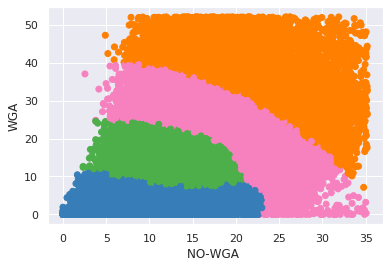

Number of clusters  5


/home/david/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Converged:  False
BIC:  2433606.2355352785


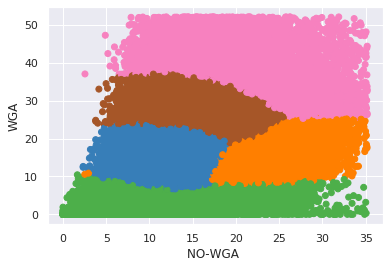

Number of clusters  6


/home/david/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Converged:  False
BIC:  2432115.822850177


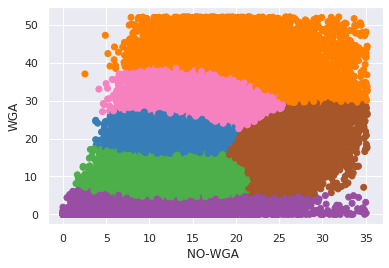

Number of clusters  10


/home/david/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Converged:  False
BIC:  2430467.7986703366


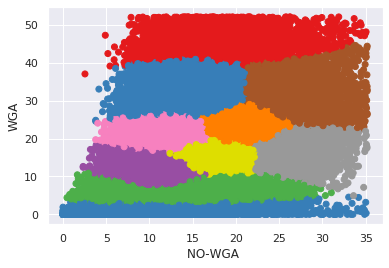

In [76]:
gmm_clustering(clusters=[4,5,6,10], data=data, tol=1.0e-5, cov_type='full',
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)


Number of clusters  2
Converged:  True
BIC:  2442664.804767533


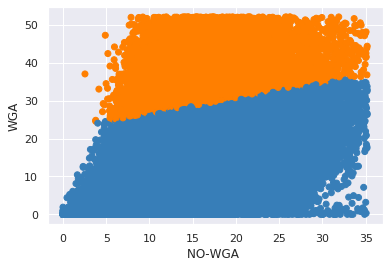

Number of clusters  3
Converged:  True
BIC:  2440314.9011068526


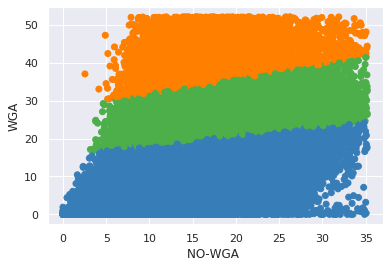

In [73]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='tied',
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

Number of clusters  4


/home/david/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Converged:  False
BIC:  2436235.068636135


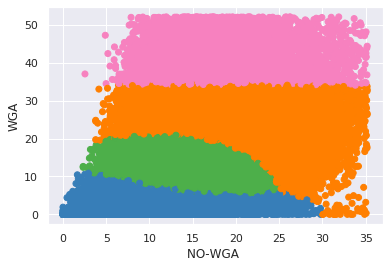

Number of clusters  5


/home/david/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Converged:  False
BIC:  2433617.9816198633


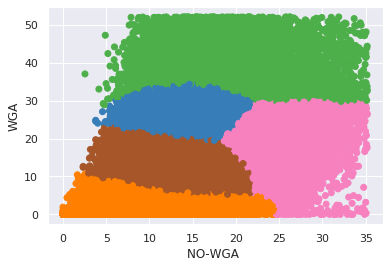

Number of clusters  6


/home/david/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Converged:  False
BIC:  2432787.3367518624


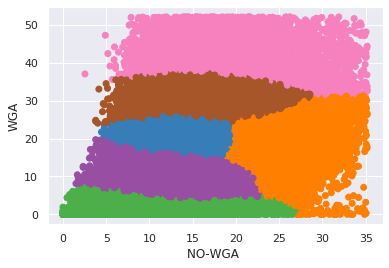

Number of clusters  10


/home/david/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Converged:  False
BIC:  2430071.8850413337


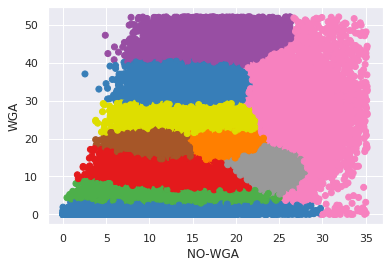

In [77]:
gmm_clustering(clusters=[4,5,6,10], data=data, tol=1.0e-5, cov_type='diag',
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

Number of clusters  2
Converged:  True
BIC:  2481078.097689248


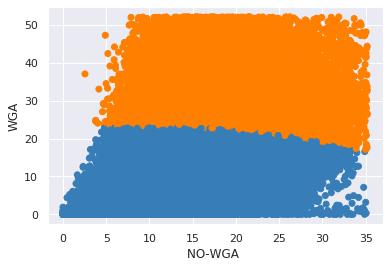

Number of clusters  3
Converged:  True
BIC:  2448804.093533169


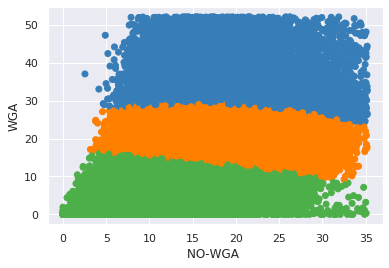

In [75]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='spherical',
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

## Two means + Ratio

In [51]:
# do a min/max normalization
#wga_max = max(wga_mu)
#wga_min = min(wga_mu)

#no_wga_max = max(no_wga_mu)
#no_wga_min = min(no_wga_mu)

#wga_mu_norm = [(x - wga_min)/(wga_max - wga_min) for x in wga_mu]
#no_wga_mu_norm = [(x - no_wga_min)/(no_wga_max - no_wga_min) for x in no_wga_mu]


data = make_data_array(wga_mu=wga_mu, 
                       no_wga_mu=no_wga_mu, gc=None, 
                       use_ratio=True, use_gc=False)

data = np.array(data)

assert data.shape == (len(wga_mu), 3)

### KMeans

Number of clusters  2
Calinski score:  218080.81031285593
Davies score:  0.7991225683766195


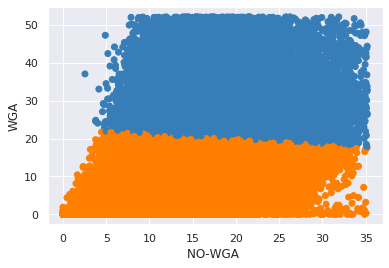

Number of clusters  3
Calinski score:  209088.74835130404
Davies score:  0.8706000984836711


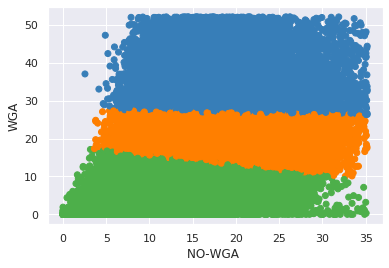

In [55]:
kmeans_clustering(clusters=N_CLUSTERS, data=data, no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### GMM

Number of clusters  2
Converged:  True
BIC:  2112135.4759010393


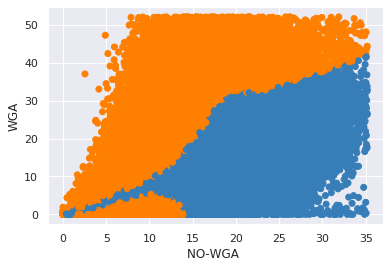

Number of clusters  3
Converged:  True
BIC:  1969278.706542586


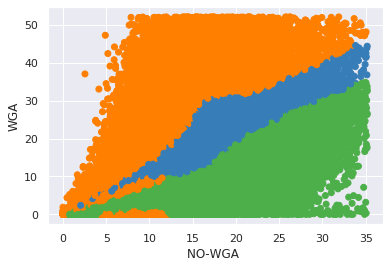

In [59]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='full',
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

Number of clusters  2
Converged:  True
BIC:  2323746.1254119514


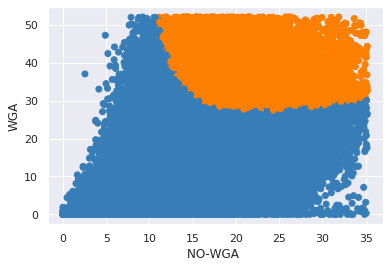

Number of clusters  3
Converged:  True
BIC:  2319389.1015373357


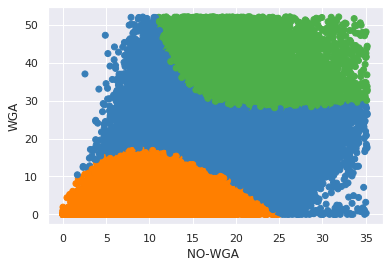

In [63]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-3, cov_type='tied',
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

Number of clusters  4


/home/david/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Converged:  False
BIC:  2436253.5624953634


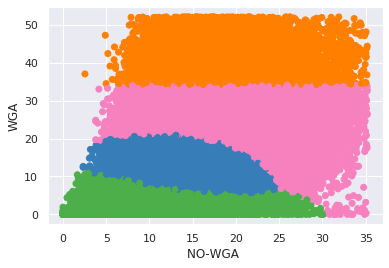

Number of clusters  5


/home/david/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Converged:  False
BIC:  2433712.277881075


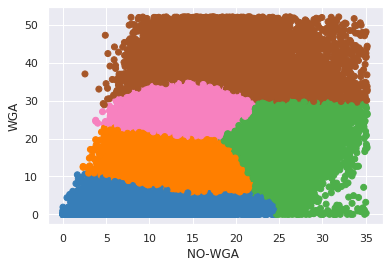

Number of clusters  6


/home/david/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Converged:  False
BIC:  2432911.569860031


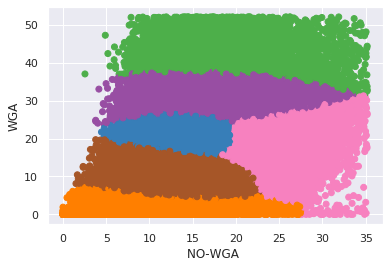

Number of clusters  10


/home/david/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Converged:  False
BIC:  2429990.0457631983


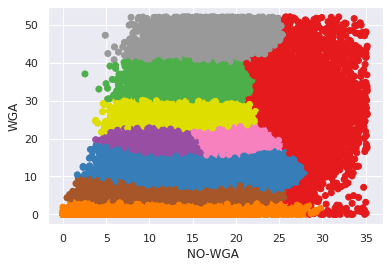

In [78]:
gmm_clustering(clusters=[4, 5, 6, 10], data=data, tol=1.0e-5, cov_type='diag',
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

Number of clusters  2
Converged:  True
BIC:  3411640.767234614


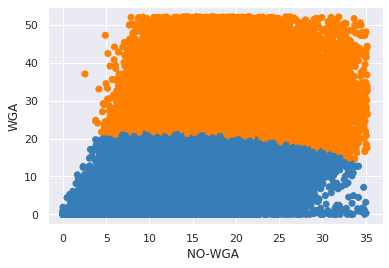

Number of clusters  3
Converged:  True
BIC:  3310749.193181598


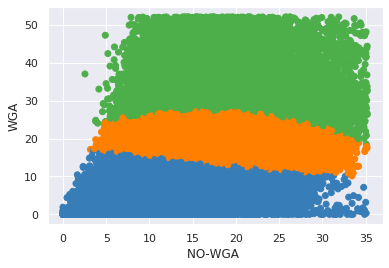

In [62]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='spherical',
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

## Two means + GC

In [108]:
data = make_data_array(wga_mu=wga_mu, 
                       no_wga_mu=no_wga_mu, gc=gc, 
                       use_ratio=False, use_gc=True)

data = np.array(data)

assert data.shape == (len(wga_mu), 3)

### KMeans

Number of clusters  2
Calinski score:  218389.32385444336
Davies score:  0.7999176246426883


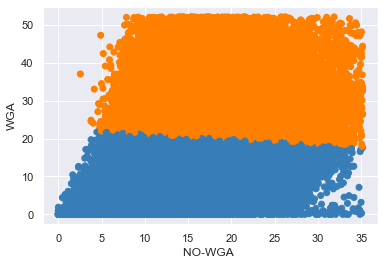

Number of clusters  3
Calinski score:  209528.1607223181
Davies score:  0.8705524494060652


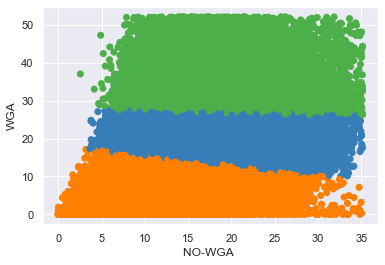

Number of clusters  4
Calinski score:  191914.88935096154
Davies score:  0.9493473539178237


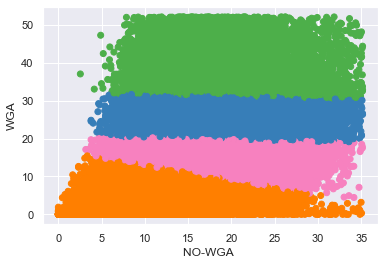

Number of clusters  5
Calinski score:  185074.28007727934
Davies score:  0.8981831804112869


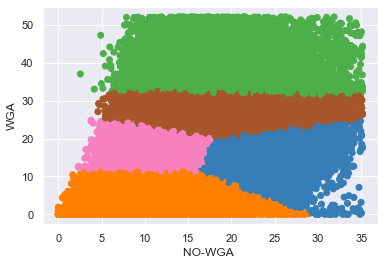

In [109]:
kmeans_clustering(clusters=N_CLUSTERS, data=data)
 

### GMM

Number of clusters  2
BIC:  2092320.7503889874


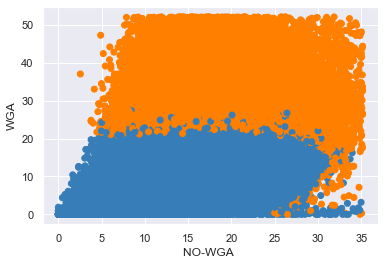

Number of clusters  3
BIC:  2087839.7983330467


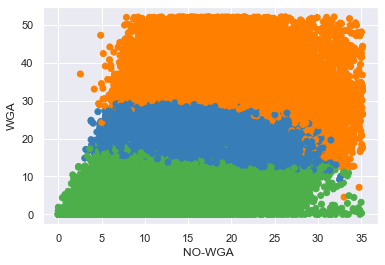

Number of clusters  4
BIC:  2087295.4034580823


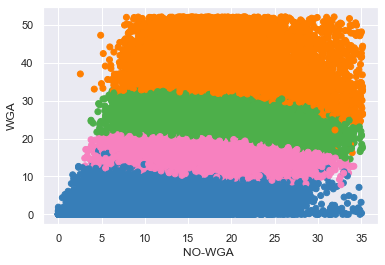

Number of clusters  5
BIC:  2084783.8656329839


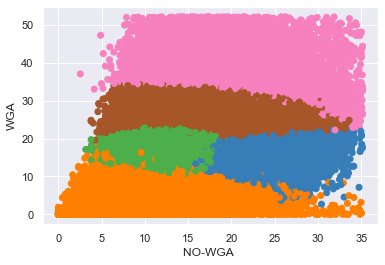

In [110]:
gmm_clustering(clusters=N_CLUSTERS, data=data)

## Two means + GC + Ratio

In [111]:
data = make_data_array(wga_mu=wga_mu, 
                       no_wga_mu=no_wga_mu, gc=gc, 
                       use_ratio=True, use_gc=True)

data = np.array(data)

assert data.shape == (len(wga_mu), 4)

## KMeans

Number of clusters  2
Calinski score:  218040.47067675696
Davies score:  0.8005916299263406


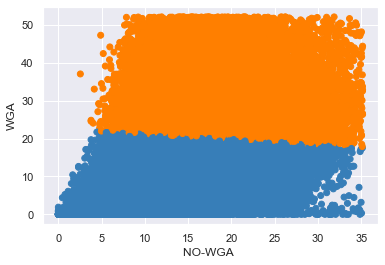

Number of clusters  3
Calinski score:  209019.33248445785
Davies score:  0.8714034685556658


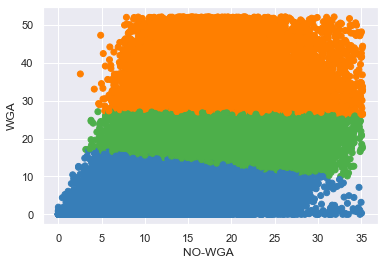

Number of clusters  4
Calinski score:  191349.22203387957
Davies score:  0.9478144715943108


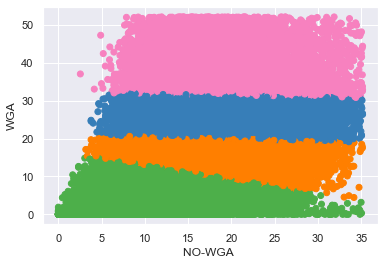

Number of clusters  5
Calinski score:  184517.00639546342
Davies score:  0.8970220182850008


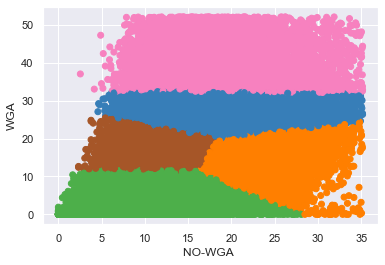

In [112]:
kmeans_clustering(clusters=N_CLUSTERS, data=data)

### GMM

Number of clusters  2
BIC:  1764632.1905069773


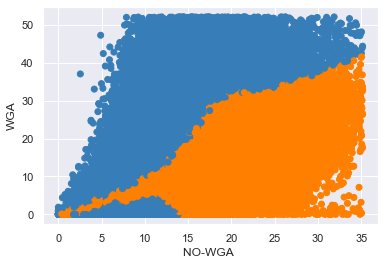

Number of clusters  3
BIC:  1621313.1909081442


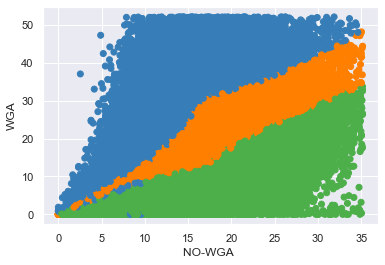

Number of clusters  4
BIC:  1514553.122349354


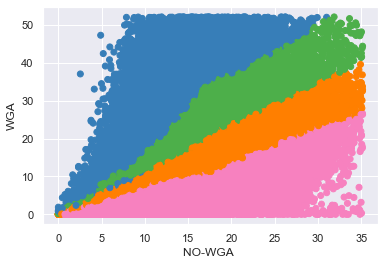

Number of clusters  5
BIC:  1439225.800776098


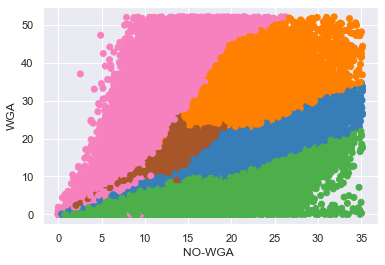

In [113]:
gmm_clustering(clusters=N_CLUSTERS, data=data)

In [45]:
#gmm_clustering(clusters=[6,10], data=data)

In [34]:
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

In [110]:
mu = np.mean(no_wga_mu)
sigma = np.var(no_wga_mu)
print(mu, sigma)
x = np.random.normal(mu, sigma, 10000)

mu = np.mean(wga_mu)
sigma = np.var(wga_mu)
print(mu, sigma)
y = np.random.normal(mu, sigma, 10000)
    

16.24269504502803 21.10931204078077
18.00699696215919 100.56252905243802


In [101]:
print("Size x: ", len(x))
print("Size y: ", len(y))

Size x:  10000
Size y:  10000


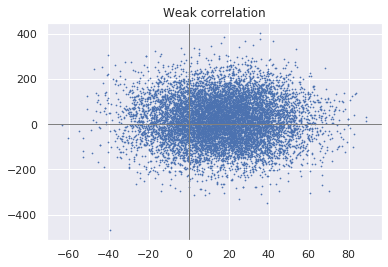

In [102]:
fig, ax = plt.subplots(1, 1)#, figsize=(9, 3))
ax.scatter(x, y, s=0.5)
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)

#confidence_ellipse(x, y, ax, edgecolor='red')

#ax.scatter(mu[0], mu[1], c='red', s=3)
ax.set_title(title)

plt.show()

In [103]:
data = make_data_array(wga_mu=y, no_wga_mu=x, use_ratio=False, use_gc=False, gc=None)

In [104]:
data = np.array(data)

In [44]:
#kmeans_clustering(clusters=N_CLUSTERS, data=data, no_wga_mu=x, wga_mu=y)

In [43]:
#gmm_clustering(clusters=N_CLUSTERS, data=data, no_wga_mu=x, wga_mu=y)

In [42]:
#data = make_data_array(wga_mu=y, no_wga_mu=x, use_ratio=True, use_gc=False, gc=None)
#data = np.array(data)
#print(data)
#assert data.shape == (len(y), 3)

In [41]:
#kmeans_clustering(clusters=N_CLUSTERS, data=data, no_wga_mu=x, wga_mu=y)

In [40]:
#gmm_clustering(clusters=N_CLUSTERS, data=data, no_wga_mu=x, wga_mu=y)